In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

data = load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [2]:
X = data["data"].copy()[ :, 2:4]# 2 columns to allow straightforward decision boundary visualization
y = data["target"].copy()

stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in stratSplit.split(X, y):
    X_train = X[train_index]
    X_test = X[test_index]
    
    y_train = y[train_index]
    y_test = y[test_index]

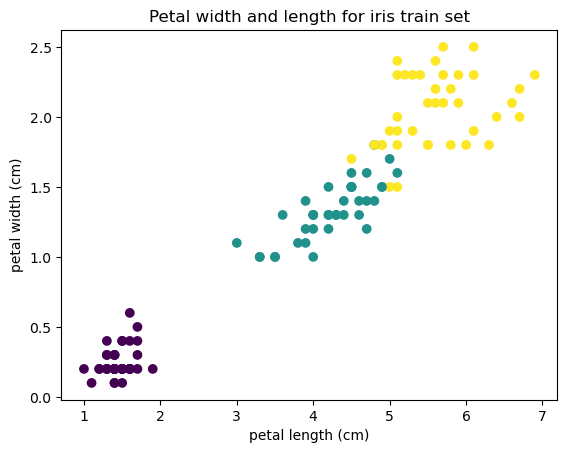

In [3]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.xlabel(data["feature_names"][2])
plt.ylabel(data["feature_names"][3])
plt.title("Petal width and length for iris train set")
plt.savefig("irisSimpleScatter.png", bbox_inches="tight")
plt.show()

In [4]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    # Number of trees in the forest
    n_estimators=100,

    # Whether to use bootstrap sampling when building trees
    bootstrap=True,

    # Maximum number of samples to draw for training each tree (if bootstrap is True)
    max_samples=None,  # int, float

    # Whether to use out-of-bag samples to estimate the generalization accuracy
    oob_score=True,

    # Function to measure the quality of a split
    criterion="gini",

    # #splitter = "best", not available here, performs best  #set to "best" or "random"

    # Maximum depth of the tree
    max_depth=1,  # decision stumps

    # Minimum number of samples required to split an internal node
    min_samples_split=2,

    # Minimum number of samples required to be at a leaf node
    min_samples_leaf=1,

    # Minimum weighted fraction of the sum total of weights required to be at a leaf node
    min_weight_fraction_leaf=0,

    # Number of features to consider when looking for the best split
    max_features=None,

    # Maximum number of leaf nodes
    max_leaf_nodes=None,

    # Random seed for reproducibility
    random_state=None,

    # Minimum impurity decrease required to make a split
    min_impurity_decrease=0.0,

    # Weights associated with classes in the form of a dictionary
    class_weight=None,

    # Complexity parameter used for Minimal Cost-Complexity Pruning
    ccp_alpha=0.0,

    # Number of jobs to run in parallel (-1 means using all available cores)
    n_jobs=-1
)

rf_clf.fit(X_train, y_train)
print("Test score:",rf_clf.score(X_test,y_test))
print("OOB score:",rf_clf.oob_score_)

Test score: 0.9333333333333333
OOB score: 0.95


In [5]:
#attribute in your code provides information about the relative importance of each 
#feature in your Random Forest model. It's essentially a measure of how much each 
#feature contributes to the overall predictions made by the model.
#result: slow impact because it's close to a 50:50
rf_clf.feature_importances_

array([0.46, 0.54])

In [7]:
#same plotting as for the decision trees
def plotDecisionBoundary(svc, X, y, X_train, y_train, title, ax):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    xx_r = xx.ravel()
    yy_r = yy.ravel()
    Z = svc.predict(np.c_[xx_r, yy_r])

    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
    ax.scatter(X[:, 0],X[:, 1],c=y, cmap=plt.cm.cool)
    ax.set_xlabel(data["feature_names"][2])
    ax.set_ylabel(data["feature_names"][3])
    ax.set_title(title)

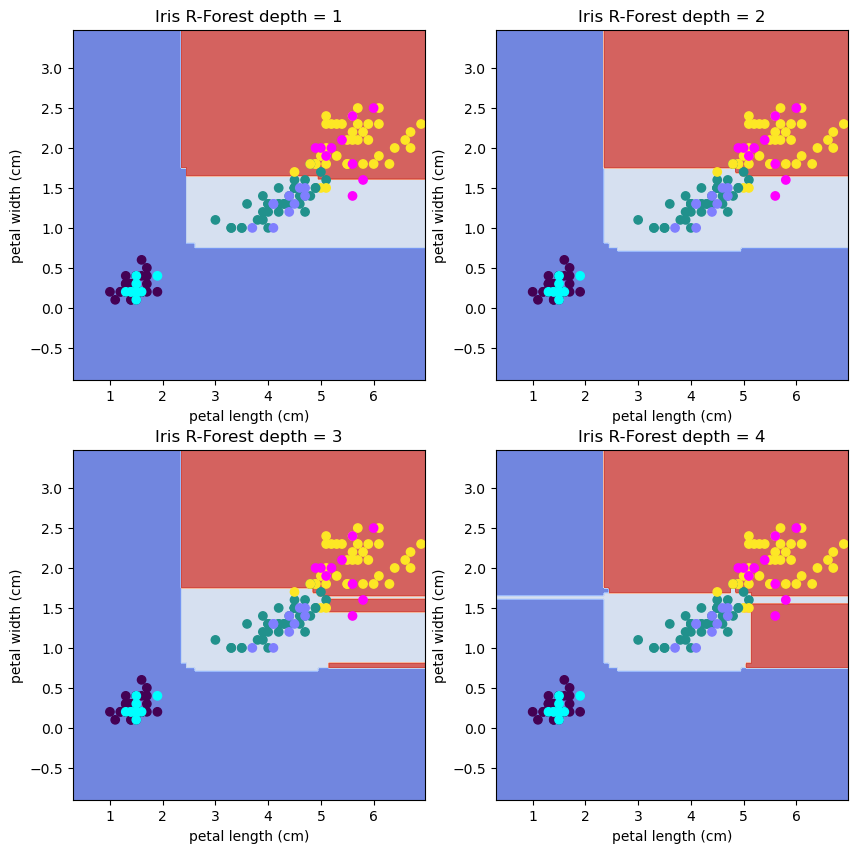

In [8]:
#plotting the results of the RF in different figures with different max_depth
fig = plt.figure(figsize=(10,10))
max_depth = 1
for i in range(1,5):
    ax = fig.add_subplot(2,2,i)
    rf_clf = RandomForestClassifier(max_depth = max_depth, random_state = 1)
    rf_clf.fit(X_train, y_train)
    plotDecisionBoundary(rf_clf, X_test, y_test, X_train, 
                         y_train, title=f"Iris R-Forest depth = {max_depth}", ax=ax)
    max_depth += 1
plt.show()

#result: decision boundaries here are much more granular than the decision boundaries before
#because we have so many estimators now (each one making its own decision)
#image 3 and 4 show some overfitting (red blocks in the lightblue block)

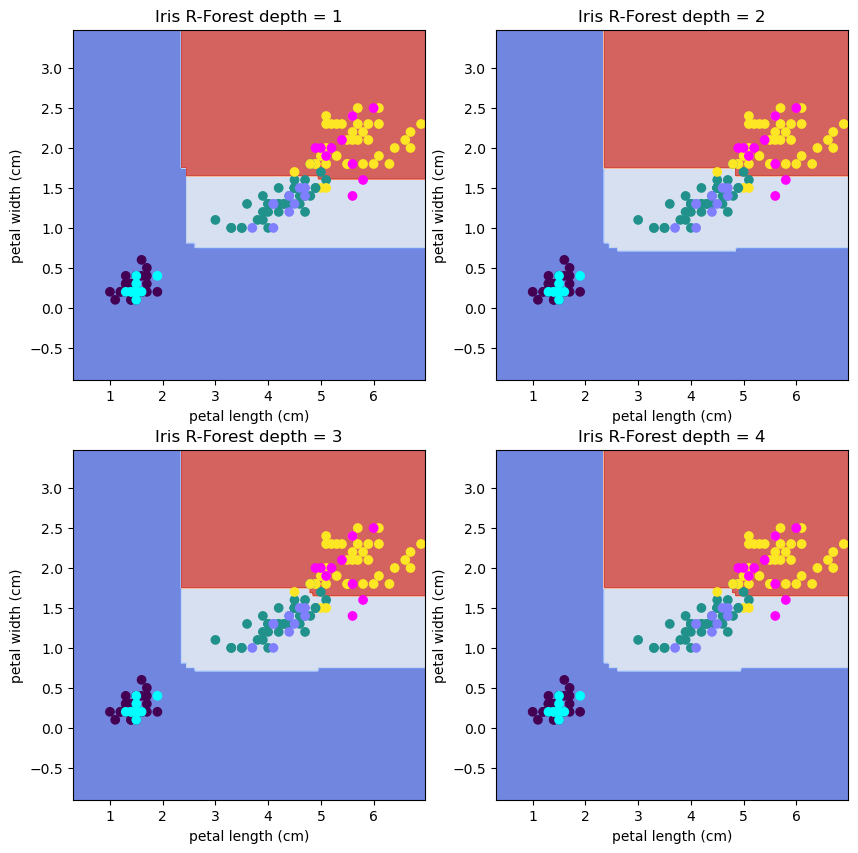

In [9]:
#same thing as in the cell before but now with pruning (using the ccp_alpha value)
#that means less final tree nodes

fig = plt.figure(figsize=(10,10))
max_depth = 1
for i in range(1,5):
    ax = fig.add_subplot(2,2,i)
    rf_clf = RandomForestClassifier(max_depth = max_depth, random_state = 1, ccp_alpha=.05)
    rf_clf.fit(X_train, y_train)
    plotDecisionBoundary(rf_clf, X_test, y_test, X_train, 
                         y_train, title=f"Iris R-Forest depth = {max_depth}", ax=ax)
    max_depth += 1
plt.show()

#result: no more overfitting thanks to pruning!!!